# Projet de machine learning utilisant le dataset de kank mrketing d'une banque portuguaise.
## On va utiliser les modeles de classification pour predire si un client va souscrire ou non à une offre bancaire via marketing direct (appel telphonique)

## Setup libraries

In [11]:
import pandas as pd
import numpy as numpy
import matplotlib as mp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [21]:
bank_file_path = "input/bank-additional-full.csv"
bank_data = pd.read_csv(bank_file_path, sep=";")

print(bank_data.head())
#print(bank_data.describe())
#print(bank_data.info())
#bank_data.shape

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [13]:
def read_file(path):
    bank_data = pd.read_csv(bank_file_path, sep=";")
    return bank_data

bank_file_path = "input/bank-additional-full.csv"
bank_data  = read_file(bank_file_path)
bank_data.dtypes

age                 int64
job                   str
marital               str
education             str
default               str
housing               str
loan                  str
contact               str
month                 str
day_of_week           str
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome              str
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                     str
dtype: object

## Extraire les données d'entrainement des données de tests


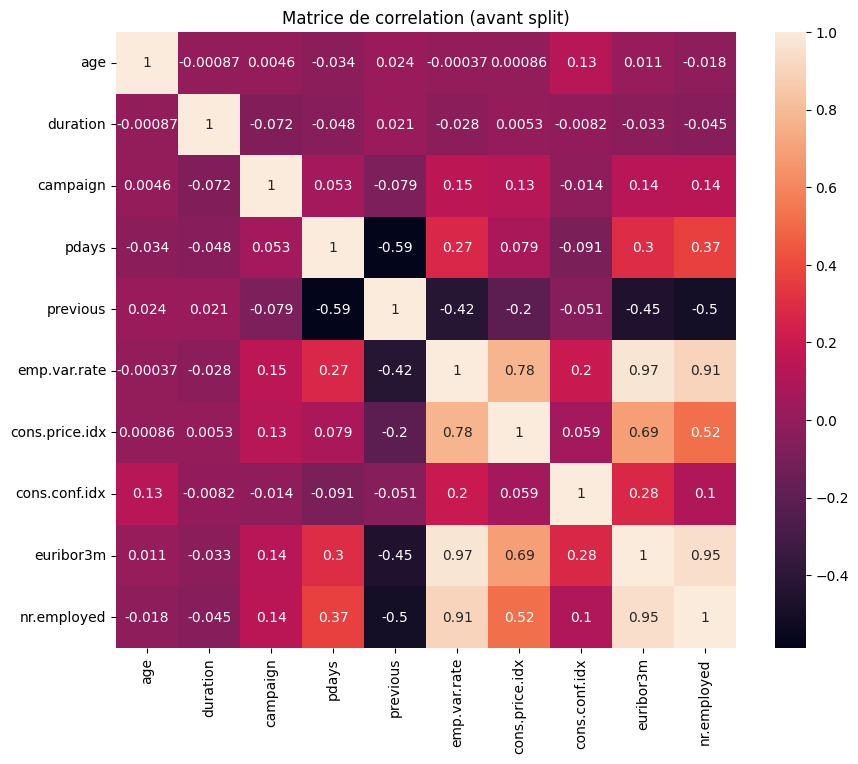

In [20]:
# Visualisation
num_total_cols = [col for col in bank_data.columns if bank_data[col].dtype in ['int64', 'float64']]
cor_bank_data = bank_data[num_total_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_bank_data, annot=True)
plt.title('Matrice de correlation (avant split)')
plt.show()

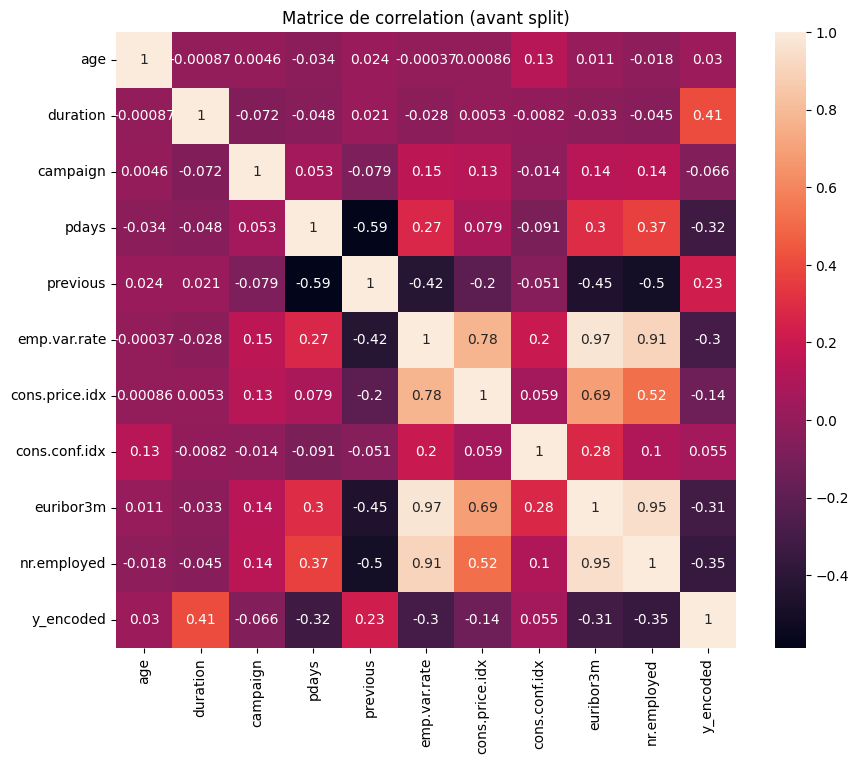

In [26]:
# Encoder la cible en 0/1 (ex : "non" = 0, "oui" = 1)
bank_data['y_encoded'] = bank_data['y'].map({'no': 0, 'yes': 1})

num_total_cols_encoded = num_total_cols + ['y_encoded']

cor_with_target = bank_data[num_total_cols_encoded].corr()['y_encoded'].sort_values(ascending=False)
#print(cor_with_target)

plt.figure(figsize=(10,8))
sns.heatmap(bank_data[num_total_cols_encoded].corr(), annot=True)
plt.title('Matrice de correlation (avant split)')
plt.show()


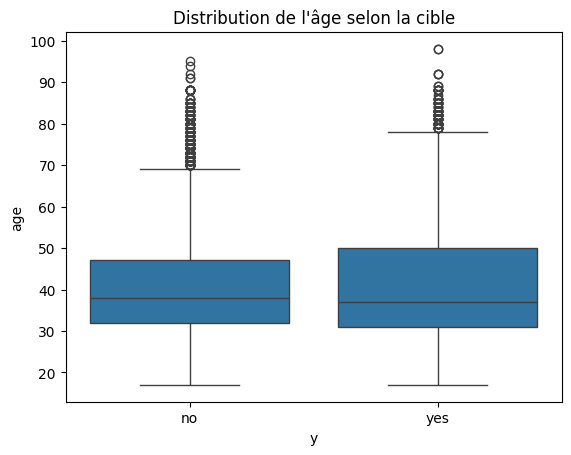

In [27]:

sns.boxplot(x='y', y='age', data=bank_data)
plt.title("Distribution de l'âge selon la cible")
plt.show()


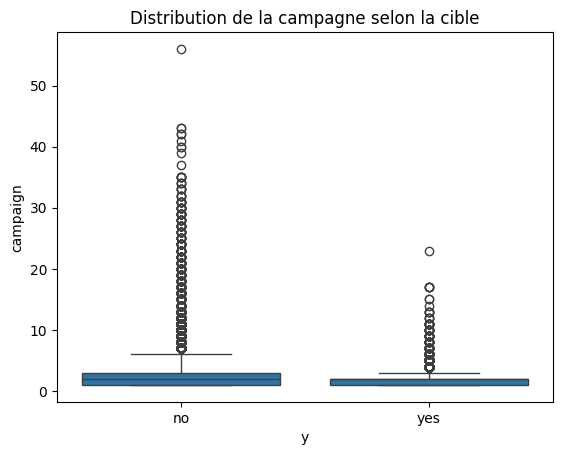

In [28]:
sns.boxplot(x='y', y='campaign', data=bank_data)
plt.title("Distribution de la campagne selon la cible")
plt.show()

In [ ]:
# A supprimer : emp.var.rate, nr.employed
# A garder euribor3m
X = bank_data.drop(["y"], axis=1)
y = bank_data['y']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)


In [ ]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
#num_cols = X_train.select_dtypes(include=['int64', 'float64'])
cat_cols = [col for col in X_train.columns if X_train[col].dtype in ['str']]
#cat_cols = X_train.select_dtypes(include=['str'])
#print(num_cols)
#print(cat_cols)
print(X_train[num_cols].head())



       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
29321   40       501         3    999         0          -1.8          93.075   
23925   33        59         2    999         0           1.4          93.444   
39148   31       292         2    999         1          -1.8          93.369   
12078   29        76         1    999         0           1.4          94.465   
41021   29       168         2    999         0          -1.1          94.601   

       cons.conf.idx  euribor3m  nr.employed  
29321          -47.1      1.405       5099.1  
23925          -36.1      4.963       5228.1  
39148          -34.8      0.655       5008.7  
12078          -41.8      4.947       5228.1  
41021          -49.5      1.029       4963.6  


In [16]:
# Scaling des variables numériques
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train[num_cols])
X_train_scal

array([[ 0.00318242,  0.93980938,  0.15883399, ..., -1.42475077,
        -1.27806551, -0.93910481],
       [-0.66777237, -0.7662243 , -0.20435685, ...,  0.9522724 ,
         0.77301376,  0.84367526],
       [-0.85947374,  0.1331102 , -0.20435685, ...,  1.23319333,
        -1.7104178 , -2.18843286],
       ...,
       [-1.05117511,  0.65418383,  0.15883399, ..., -1.42475077,
        -1.3011243 , -0.93910481],
       [-0.476071  , -0.56551445, -0.5675477 , ...,  0.9522724 ,
         0.77301376,  0.84367526],
       [ 1.15339063, -0.48445855, -0.5675477 , ...,  0.8874445 ,
         0.71306091,  0.33095324]], shape=(32950, 10))

## Visualisation

In [ ]:
#heatmap
#plt.figure(figsize=(14,7))



ValueError: could not convert string to float: 'housemaid'